# Homework 2 -  Classification and Neural Networks

## *Zhiyun (David) Lu*
Netid:  *zl303*

# 1) Mathematical description of NN

### (2.5 points)

Let's assume you have a deep neural network with 10 input neurons, one hidden layer with 50 neurons, and one output layer with 3 neurons. All neurons use the hyperbolic tangent as activation. 

**(a)** What are the dimensions of a pair of feature and target variables $\bf x_i$  and $\bf y_i$? (*0.5 points*)

**(b)** What are the dimensions of the first weight matrix $\bf w_1$ and the corresponding bias vector $\bf b_1$?  (*0.5 points*)  

**(c)** What are the dimensions of the weight matrix $\bf w_2$ and the bias vector $\bf b_2$ of the output layer?   (*0.5 points*)

**(d)** Write down the equation to compute $\bf y_i$. (*0.5 points*)

**(e)** How many trainable parameters does this network have? (*0.5 points*)

**ANSWER**

**(a)**
$\bf x_i$ is $10\times 1$ while $\bf y_i$ is $3\times 1$


**(b)**
$\bf w_1$ is $50\times 10$, $\bf b_1$ is $50\times 1$

**(c)**
$\bf w_2$ is $3\times 50$, $\bf b_2$ is $3\times 1$

**(d)**
$\bf y_i$ = $\bf w_2$($\bf w_1$$\bf x_i$ + $\bf b_1$) + $\bf b_2$

# 2) Classification with a deep neural network 
### (4 points)

**(a)** Create 1000 training and 400 test data points with the make_moons function from Scikit Learn. Set the noise level to 0.2. (*0.5 points*)

**(b)**  Design a neural network using Keras. The first hidden layer has 100 neurons with rectified linear units as activation. The second hidden layer has 25 neurons and also rectified linear units as activation. The output layer uses 
sigmoid activation. The loss function is binary crossentropy, the gradient descent method is Adam and the metric used for evaluation is accuracy. (*1 point*)

**(c)** Train the network with a batch size of 64 for 100 epochs. Use early stopping if the validation loss does not change over 4 epochs. Report the test accuracy. (*0.5 point*)

**(d)** Plot the test data points together with a mesh indicating the prediction of the neural network. (You can reuse the code from the logistic regression example.)  (*0.5 point*)

**(e)** Make two figures showing the evolution of loss and accuracy as a function of number of epochs. In both figures show training and test results.(*0.5 point*)

**(f)** Create a new model where you change the the activation of the two hidden layers to sigmoid. Train it and plot the prediction together with the test data (as in part d) (*1 point*)

**ANSWER**

In [116]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline

In [117]:
# a
# dataset creation
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

n_samples = 1400
noise = 0.2

X, y = make_moons(n_samples=n_samples, noise=noise)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400)

In [118]:
# b
# Designing the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(2,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               300       
                                                                 
 dense_49 (Dense)            (None, 25)                2525      
                                                                 
 dense_50 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [119]:
# b
# compilation
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [120]:
# c
# training the model
batch_size = 64
epochs = 100

# early stop setting
from keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', patience=4)

# train and save in history
history = model.fit(X_train,y_train,batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[monitor],
                    validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6495 - accuracy: 0.7120 - val_loss: 0.5978 - val_accuracy: 0.8425
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.8720 - val_loss: 0.5032 - val_accuracy: 0.8350
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8670 - val_loss: 0.4104 - val_accuracy: 0.8350
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8610 - val_loss: 0.3542 - val_accuracy: 0.8400
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8700 - val_loss: 0.3269 - val_accuracy: 0.8475
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8770 - val_loss: 0.3116 - val_accuracy: 0.8525
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8830 - val_loss: 0.3010 - val_accuracy: 0.8525
Epoch 8/100
1

In [121]:
# c
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy: {:.4f}".format(score[1]))

Test accuracy: 0.9625


5753/5753 [==============================] - 3s 445us/step


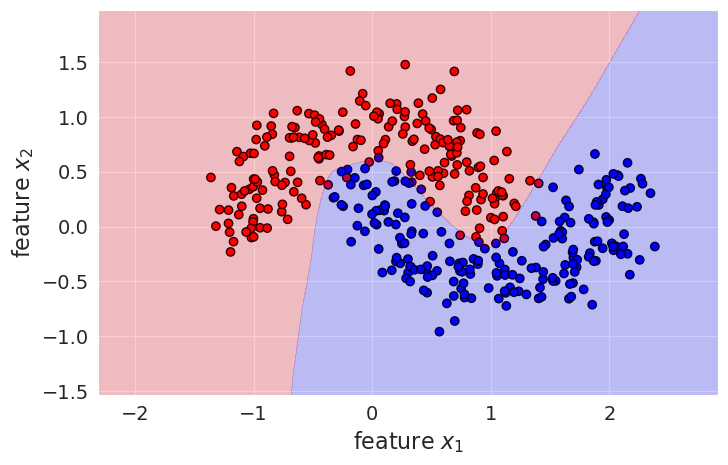

In [122]:
# d
# plotting
from matplotlib.colors import ListedColormap

# choose colormap
cm_data = ListedColormap(['#ff0000', '#0000ff'])

# determine plot boundaries
x1_min = X[:, 0].min() - .5
x1_max = X[:, 0].max() + .5
x2_min = X[:, 1].min() - .5
x2_max = X[:, 1].max() + .5

# create a mesh of size [x1_min, x1_max] x [x2_min, x2_max].
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
# function for plotting decision boundary
def show_bound (dnn_model):

    # assign predictions to each mesh point
    z = dnn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # plot the result
    plt.figure(figsize=(8, 5))

    # data
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_data, edgecolors="k")

    # boundary
    plt.contourf(xx, yy, z, cmap=cm_data, alpha=.2, levels=1)

    plt.xlabel('feature $x_1$', size=16)
    plt.ylabel('feature $x_2$', size=16)

    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    plt.show()

show_bound(model)

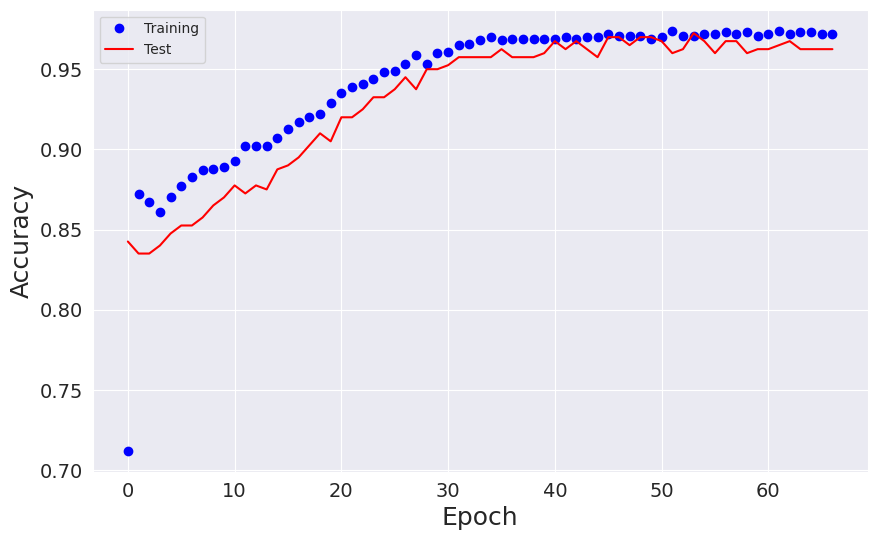

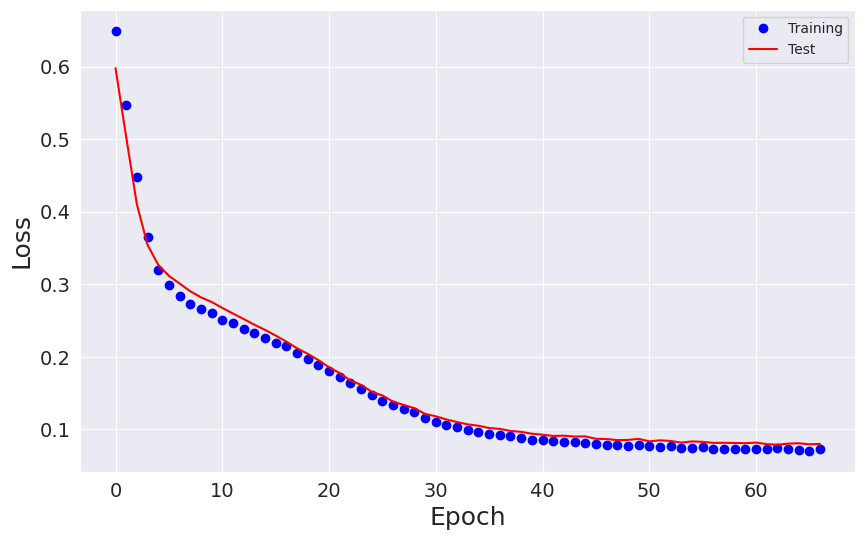

In [123]:
# e
# show the learning process
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo', label='Training')
plt.plot(epochs, val_accuracy, 'r', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [124]:
# f
# Designing the neural network
model2 = Sequential()
model2.add(Dense(100, activation='sigmoid', input_shape=(2,)))
model2.add(Dense(25, activation='sigmoid'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 100)               300       
                                                                 
 dense_52 (Dense)            (None, 25)                2525      
                                                                 
 dense_53 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [125]:
# f
# compilation
model2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [126]:
# f
# training the model
batch_size = 64
epochs = 100
# train and save in history
history2 = model2.fit(X_train,y_train,batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[monitor],
                    validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.5770 - val_loss: 0.6730 - val_accuracy: 0.6225
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5790 - val_loss: 0.6604 - val_accuracy: 0.7700
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5990 - val_loss: 0.6473 - val_accuracy: 0.7675
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7800 - val_loss: 0.6329 - val_accuracy: 0.7875
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7900 - val_loss: 0.6136 - val_accuracy: 0.8050
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7860 - val_loss: 0.5923 - val_accuracy: 0.8000
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7920 - val_loss: 0.5667 - val_accuracy: 0.8025
Epoch 8/100
1

5753/5753 [==============================] - 3s 466us/step


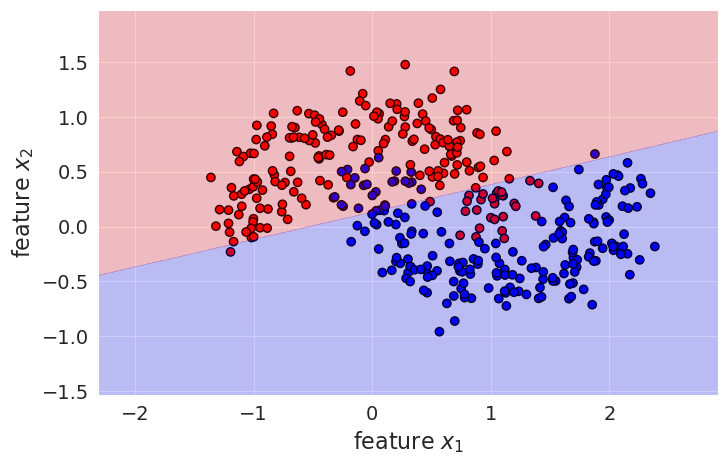

In [127]:
show_bound(model2)

# 3) Precision or recall
### (1 point)

Invent a new (i.e. not yet exisiting) machine learning classifier, one that you would like to use in **your personal** daily life. Would you rather want a high precision, recall, or do they matter both? 



**ANSWER**

I would make a classifier that determine if a dish contains cilantro leaves based  on delivery service apps like Meituan. Since I am allergic to cilantro leaves, I would rather want a high precision.

# 4) Demonstration of the universal approximation theorem
### (4.5 points)


**(a)**  Write a function which computes $f(x)=0.2 + 0.4 \;x^2 + 0.3 \;x\; sin(9x)$. Create a vector x_train which contains 10000 evenly spaced points between 0 and 1. Compute the vector y_train = f(x_train). Plot y_train versus x_train. This is the function we want to approximate with a neural network containing one hidden layer. (*1 point*)

**(b)**  Create a neural network with one input neuron, a hidden layer with 50 neurons and sigmoid activation and one output neuron with linear activation. Choose Mean Squared Error as loss function and Adam(learning_rate=0.005) as gradient descent method. Train the model with a batch size of 2000 for 4000 epochs. (We do not need test data in this demonstration.)

After training the network make a prediction using x_train and plot this prediction together with y_train (i.e. the function the network tries to approximate). (*2 points*)

**(c)**  Plot the evolution of the loss function with a logarithmic y-axis. Then re-initialize the network (!) and rerun the training with the learning rate for Adam set to 0.002. Plot again the evolution of the loss function-
Describe in one sentence how this curve has changed.  
(*1.5 points*)

**ANSWER**

In [128]:
# a
# define function
def f(x):
    result = 0.2 + 0.4 * x * x + 0.3 * x * np.sin(9 * x)
    return result

In [129]:
# a
# create data
x_train = np.linspace(0,1,10000)
y_train = f(x_train)

In [130]:
# b
# design model
model3 = Sequential()
model3.add(Dense(50, activation='sigmoid', input_shape=(1,)))
model3.add(Dense(1,activation='relu'))
model3.save_weights("init.h5")

model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 50)                100       
                                                                 
 dense_55 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [131]:
# b
# compilation
model3.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.005))

In [132]:
# b
# training the model
batch_size = 2000
epochs = 4000
# train and save in history
history3 = model3.fit(x_train,y_train,batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 2/4000
5/5 [==============================] - 0s 845us/step - loss: 0.0486
Epoch 3/4000
5/5 [==============================] - 0s 910us/step - loss: 0.0432
Epoch 4/4000
5/5 [==============================] - 0s 901us/step - loss: 0.0383
Epoch 5/4000
5/5 [==============================] - 0s 989us/step - loss: 0.0343
Epoch 6/4000
5/5 [==============================] - 0s 920us/step - loss: 0.0309
Epoch 7/4000
5/5 [==============================] - 0s 834us/step - loss: 0.0280
Epoch 8/4000
5/5 [==============================] - 0s 936us/step - loss: 0.0255
Epoch 9/4000
5/5 [==============================] - 0s 876us/step - loss: 0.0236
Epoch 10/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 11/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 12/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 13/4000
5/5 [==============

313/313 [==============================] - 0s 350us/step


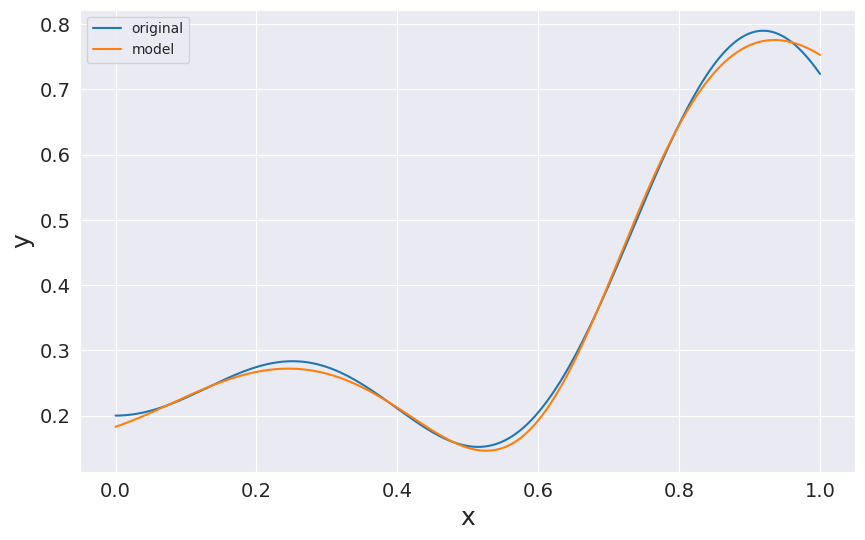

In [133]:
# b
# prediction and plotting
y_pred = model3.predict(x_train)

plt.figure(figsize=(10,6))
plt.plot(x_train,y_train,label='original')
plt.plot(x_train,y_pred,label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

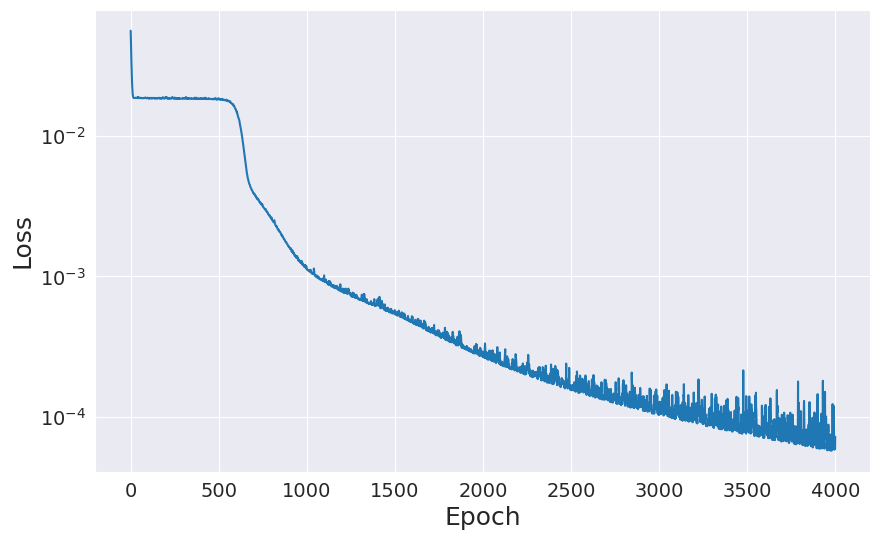

In [134]:
# c
# plotting evolution
loss = history3.history['loss']
epochs = range(len(loss))

plt.figure(figsize=(10, 6))
plt.semilogy(epochs, loss, label='Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [135]:
# c
model3.load_weights('init.h5')
model3.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.002))

In [136]:
# c
# training the model
batch_size = 2000
epochs = 4000
# train and save in history
history3 = model3.fit(x_train,y_train,batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 2/4000
5/5 [==============================] - 0s 850us/step - loss: 0.0500
Epoch 3/4000
5/5 [==============================] - 0s 938us/step - loss: 0.0476
Epoch 4/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 5/4000
5/5 [==============================] - 0s 841us/step - loss: 0.0426
Epoch 6/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 7/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 8/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 9/4000
5/5 [==============================] - 0s 765us/step - loss: 0.0344
Epoch 10/4000
5/5 [==============================] - 0s 875us/step - loss: 0.0326
Epoch 11/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 12/4000
5/5 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 13/4000
5/5 [====================

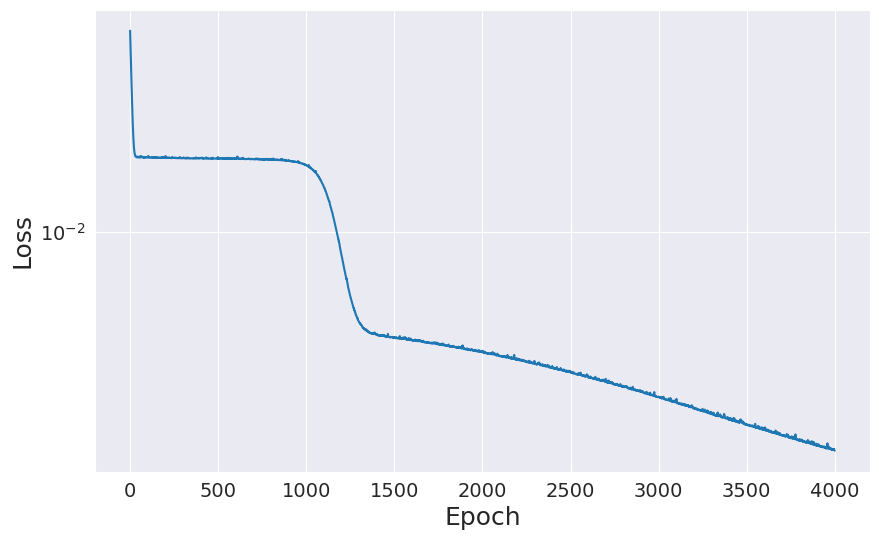

In [137]:
# plotting evolution
loss = history3.history['loss']
epochs = range(len(loss))

plt.figure(figsize=(10, 6))
plt.semilogy(epochs, loss, label='Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**(c)**
The curve is smoother